# Testing GraphSearch Distance Concepts

## Load Libraries

In [1]:
import srex_new
import operator
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords

#Download stopword
nltk.download('stopwords') 
nltk.download('punkt') # Tokenizers
nltk.download('wordnet') # Wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Initialize some variables

In [2]:
# Stop Words
stop_words_list = stopwords.words('english') #a small one
newStopWords = get_stop_words('en') # a big one
stop_words_list.extend(newStopWords) # all together

In [3]:
query                    = 'internet of things'
reference_terms          = ['iot', 'internet of things']
nr_search_results        = 10

ranking_weight_type      = 'none' # it can be: 'none', 'linear' or 'inverse'
limit_distance           = 4 
sumarize                 = 'none' 
include_reference_term   = False
nr_of_graph_terms        = 5
format_adjacent_refterms = True


In [4]:
# Articulo de revista científica IEEE Explore
#doc = srex_new.get_ieee_explore_article('article_number', '8316016')

# Ranking de documentos de IEEE Explore CON ponderación de documentos
results = srex_new.get_ieee_explore_ranking(query, nr_search_results)
#results

# Ranking de documentos de IEEE Explore SIN ponderación de documentos
#results = srex_new.get_ieee_explore_ranking("search engine", 10)

In [5]:
list_of_documents = srex_new.get_ranking_as_weighted_documents(results, ranking_weight_type)
#list_of_documents

In [6]:
sentences_list = srex_new.get_sentences_list_from_documents(list_of_documents)
#sentences_list

## Text transformations

Remove stopwords, punctuation, stemming, lematization

In [7]:
processed_sentences_list = srex_new.do_text_transformations_by_document(sentences_list, stop_words_list, lema=True, stem=False)
reference_terms = srex_new.do_text_transformations_by_string_in_list(reference_terms, stop_words_list, lema=True, stem=False)

#processed_sentences_list
#reference_terms

## Delete sentences that do not contain a reference term

In [8]:
processed_sentences_list_with_refterms = srex_new.delete_sentences_without_refterms(processed_sentences_list, reference_terms)
processed_sentences_list_with_refterms

[{'text': ['internet thing security multilayered method end end data communication cellular network',
   'aim paper put forth multilayered method securing data transport cellular connected internet thing device host cellular network'],
  'weight': 1.0},
 {'text': ['assiut iot remotely accessible testbed internet thing',
   'paper introduce basic architecture assiut iot remotely accessible testbed designed iot application',
   'testbed adopts experiment service eaas model provides suitable easy way remotely implement experiment related iot application'],
  'weight': 1.0},
 {'text': ['tornado enabling blockchain heterogeneous internet thing approach',
   'widespread application internet thing iot smart city business healthcare security data device becomes major concern',
   'although blockchain effectively enhance network security achieve fault tolerance huge resource consumption limited performance data processing restrict deployment iot scenario',
   'observing heterogeneity resource c

## Calculate word positions

In [9]:
doc_pos_matrix = srex_new.get_documents_positions_matrix(processed_sentences_list)
#doc_pos_matrix
#len(doc_pos_matrix)

## Calculate vecinity matrix

In [10]:
vecinity_matrix = srex_new.get_vecinity_matrix(doc_pos_matrix, reference_terms, limit_distance, include_reference_term, format_adjacent_refterms)
vecinity_matrix
#len(vecinity_matrix)

[{'text': [{'security': {'internet': [0, 1, 0, 0], 'thing': [1, 0, 0, 0]},
    'multilayered': {'internet': [0, 0, 1, 0], 'thing': [0, 1, 0, 0]},
    'method': {'internet': [0, 0, 0, 1], 'thing': [0, 0, 1, 0]},
    'end': {'thing': [0, 0, 0, 1]}},
   {'data': {'internet': [0, 0, 0, 1]},
    'transport': {'internet': [0, 0, 1, 0], 'thing': [0, 0, 0, 1]},
    'cellular': {'internet': [0, 1, 0, 1], 'thing': [0, 0, 2, 0]},
    'connected': {'internet': [1, 0, 0, 0], 'thing': [0, 1, 0, 0]},
    'device': {'internet': [0, 1, 0, 0], 'thing': [1, 0, 0, 0]},
    'host': {'internet': [0, 0, 1, 0], 'thing': [0, 1, 0, 0]},
    'network': {'thing': [0, 0, 0, 1]}}],
  'weight': 1.0},
 {'text': [{'assiut': {'iot': [1, 0, 0, 0]},
    'remotely': {'iot': [1, 0, 0, 0],
     'internet': [0, 0, 1, 0],
     'thing': [0, 0, 0, 1]},
    'accessible': {'iot': [0, 1, 0, 0],
     'internet': [0, 1, 0, 0],
     'thing': [0, 0, 1, 0]},
    'testbed': {'iot': [0, 0, 1, 0],
     'internet': [1, 0, 0, 0],
     'thin

In [11]:
unique_vecinity_list_by_doc = srex_new.get_unique_vecinity_dict_by_document(vecinity_matrix, limit_distance)
unique_vecinity_list_by_doc

[{'text': {'network': {'thing': [0, 0, 0, 1]},
   'security': {'internet': [0, 1, 0, 0], 'thing': [1, 0, 0, 0]},
   'connected': {'internet': [1, 0, 0, 0], 'thing': [0, 1, 0, 0]},
   'transport': {'internet': [0, 0, 1, 0], 'thing': [0, 0, 0, 1]},
   'cellular': {'internet': [0, 1, 0, 1], 'thing': [0, 0, 2, 0]},
   'device': {'internet': [0, 1, 0, 0], 'thing': [1, 0, 0, 0]},
   'end': {'thing': [0, 0, 0, 1]},
   'multilayered': {'internet': [0, 0, 1, 0], 'thing': [0, 1, 0, 0]},
   'host': {'internet': [0, 0, 1, 0], 'thing': [0, 1, 0, 0]},
   'method': {'internet': [0, 0, 0, 1], 'thing': [0, 0, 1, 0]},
   'data': {'internet': [0, 0, 0, 1]}},
  'weight': 1.0},
 {'text': {'designed': {'iot': [1, 0, 0, 1]},
   'basic': {'iot': [0, 0, 1, 0]},
   'accessible': {'thing': [0, 0, 1, 0],
    'internet': [0, 1, 0, 0],
    'iot': [0, 2, 1, 0]},
   'related': {'iot': [1, 0, 0, 0]},
   'application': {'iot': [2, 0, 0, 0]},
   'architecture': {'iot': [0, 1, 0, 0]},
   'implement': {'iot': [0, 0, 1, 0]

In [12]:
#most_freq_distance_list = srex_new.get_most_frequency_distance_list(first_sorted_terms_freq_list, unique_vecinity_list_by_doc, reference_terms[0], limit_distance)
most_freq_distance_list = srex_new.get_most_frequency_distance_list_by_refterm(unique_vecinity_list_by_doc, reference_terms[0], nr_of_graph_terms)
most_freq_distance_list

[{},
 {'remotely': {'frequency': 4, 'distance': 2.5},
  'accessible': {'frequency': 3, 'distance': 2.3333333333333335},
  'testbed': {'frequency': 3, 'distance': 2.6666666666666665},
  'designed': {'frequency': 2, 'distance': 2.5},
  'application': {'frequency': 2, 'distance': 1.0}},
 {'blockchain': {'frequency': 2, 'distance': 2.5},
  'device': {'frequency': 2, 'distance': 1.0},
  'named': {'frequency': 1, 'distance': 4.0},
  'mechanism': {'frequency': 1, 'distance': 3.0},
  'restrict': {'frequency': 1, 'distance': 2.0}},
 {},
 {'environmental': {'frequency': 1, 'distance': 3.0},
  'imperfect': {'frequency': 1, 'distance': 4.0},
  'widely': {'frequency': 1, 'distance': 1.0},
  'nowadays': {'frequency': 1, 'distance': 3.0},
  'application': {'frequency': 1, 'distance': 4.0}},
 {},
 {'business': {'frequency': 2, 'distance': 1.0},
  'revolution': {'frequency': 2, 'distance': 1.5},
  'article': {'frequency': 1, 'distance': 4.0},
  'adoption': {'frequency': 1, 'distance': 1.0},
  'promise'

In [15]:
doc_index = 9
graph = srex_new.getGraphViz(reference_terms[0], most_freq_distance_list[doc_index], '0.7', 'deepskyblue')

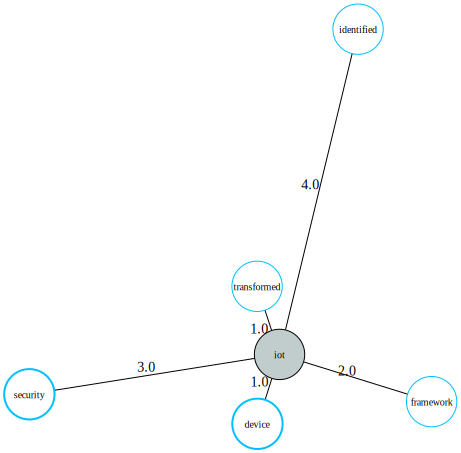

In [16]:
graph